# Bachelor and Bachelorette

#### Questions
1. How many people are eliminated on weeks when they have dates?
2. How many people are eliminated on weeks when they do not have dates?
3. How many 1-1 dates do winners go on?
4. How many group dates do winners go on?
5. How far does the contestant with the first 1-1 get?
6. How many winners had the first impression rose?
7. How far did the first impression rose get?
8. How many first impression roses also had the first date?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

In [2]:
%matplotlib inline

In [3]:
#import data
bachelor_df=pd.read_csv('bachelorette.csv')
bachelor_df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
1,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1
3,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1
4,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,NaN,D10,D8,D13,D9,D1,D3,D1,D1,NaN


In [4]:
new_header = bachelor_df.iloc[0] #grab the first row for the header
bachelor_df = bachelor_df[1:] #take the data less the header row
bachelor_df.columns = new_header #set the header row as the df header

In [5]:
bachelor_df.head(5)

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
1,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1
3,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1
4,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,NaN,D10,D8,D13,D9,D1,D3,D1,D1,NaN
5,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,NaN,D8,D8,D1,D9,D7,D1,D1,NaN,NaN


### Organize Data

##### Create a column that shows the week a contestant was eliminated.

In [6]:
#create column that has the week they were eliminated
bachelor_df['elimination_week']=bachelor_df.apply(lambda x: 
                                                  x.str.match('E', na=False)).dot(bachelor_df.columns + '/').str[:-1]
bachelor_df.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week
1,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,2,3,4,5,6,7,8,9,10,
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,NaN,D6,D13,D1,D7,D1,D1,D1,D1,
3,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,D1,D6,D13,D9,D7,D1,D1,D1,D1,ELIMINATION-10
4,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,D10,D8,D13,D9,D1,D3,D1,D1,NaN,ELIMINATION-9
5,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,D8,D8,D1,D9,D7,D1,D1,NaN,NaN,ELIMINATION-8


In [7]:
#abbreviate elimination_week column
bachelor_df['elim_week']=bachelor_df['elimination_week'].str[12:14]

In [8]:
bachelor_df['elim_week']=[value or 'winner' for value in bachelor_df['elim_week']]
bachelor_df=bachelor_df[bachelor_df.SEASON !='SEASON']

In [9]:
#fix first impression rose errors
bachelor_df['ELIMINATION-1'][(bachelor_df['CONTESTANT']=='09_DREW-K') & (bachelor_df['SEASON']=='09')] = 'R1'
bachelor_df['ELIMINATION-1'][(bachelor_df['CONTESTANT']!='09_DREW_K') & (bachelor_df['ELIMINATION-1']!='E') & (bachelor_df['SEASON']=='09')] = np.nan
bachelor_df['ELIMINATION-1'][(bachelor_df['CONTESTANT']=='17_TIERRA_L') & (bachelor_df['SEASON']=='17')] = 'R1'
bachelor_df['ELIMINATION-1'][(bachelor_df['CONTESTANT']!='17_TIERRA_L') & (bachelor_df['ELIMINATION-1']!='E') & (bachelor_df['SEASON']=='17')] = np.nan

In [10]:
bachelor_df=bachelor_df[bachelor_df.elim_week !='4/']

In [11]:
bachelor_df.head(30)

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,D6,D13,D1,D7,D1,D1,D1,D1,,winner
3,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,D6,D13,D9,D7,D1,D1,D1,D1,ELIMINATION-10,10
4,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,D8,D13,D9,D1,D3,D1,D1,NaN,ELIMINATION-9,9
5,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,D8,D1,D9,D7,D1,D1,NaN,NaN,ELIMINATION-8,8
6,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,D8,D13,D9,D7,D3,NaN,NaN,NaN,ELIMINATION-7,7
7,Bachelorette,13,13_MATT_M,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,NaN,D13,D9,D7,D3,NaN,NaN,NaN,ELIMINATION-7,7
8,Bachelorette,13,13_ALEX_B,NaN,NaN,R,NaN,NaN,E,NaN,...,D6,D13,D9,D7,NaN,NaN,NaN,NaN,ELIMINATION-6,6
9,Bachelorette,13,13_WILL_G,NaN,NaN,NaN,NaN,R,ED,NaN,...,D6,D13,D9,D1,NaN,NaN,NaN,NaN,ELIMINATION-6,6
10,Bachelorette,13,13_KENNY_L,NaN,NaN,NaN,NaN,R,ED,NaN,...,D8,D13,D2,D7,NaN,NaN,NaN,NaN,ELIMINATION-6,6
11,Bachelorette,13,13_ANTHONY_B,NaN,NaN,R,NaN,E,NaN,NaN,...,D1,D13,D9,NaN,NaN,NaN,NaN,NaN,ELIMINATION-5,5


##### Create new columns for each week to show who had a date and who did not have a date

In [12]:
bachelor_df['week2']= bachelor_df['DATES-2'].str[0]
bachelor_df['week3']= bachelor_df['DATES-3'].str[0]
bachelor_df['week4']= bachelor_df['DATES-4'].str[0]
bachelor_df['week5']= bachelor_df['DATES-5'].str[0]
bachelor_df['week6']= bachelor_df['DATES-6'].str[0]
bachelor_df['week7']= bachelor_df['DATES-7'].str[0]
bachelor_df['week8']= bachelor_df['DATES-8'].str[0]
bachelor_df['week9']= bachelor_df['DATES-9'].str[0]
bachelor_df['week10']= bachelor_df['DATES-10'].str[0]
bachelor_df.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,winner,NaN,D,D,D,D,D,D,D,D
3,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,10,D,D,D,D,D,D,D,D,D
4,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,9,D,D,D,D,D,D,D,D,NaN
5,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,8,D,D,D,D,D,D,D,NaN,NaN
6,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,7,D,D,D,D,D,D,NaN,NaN,NaN


In [13]:
#fill in 'ND' for nulls in weeks columns when the 
#contestant was not eliminated the previous week
bachelor_df['week2'][(bachelor_df['week2'].isnull())&(bachelor_df['elim_week']!='1')]='ND'
bachelor_df['week3'][(bachelor_df['week3'].isnull())&(bachelor_df['elim_week']!='1') 
                     &(bachelor_df['elim_week']!='2')]='ND'
bachelor_df['week4'][(bachelor_df['week4'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')]='ND'
bachelor_df['week5'][(bachelor_df['week5'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')]='ND'
bachelor_df['week6'][(bachelor_df['week6'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')]='ND'
bachelor_df['week7'][(bachelor_df['week7'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')
                    &(bachelor_df['elim_week']!='6')]='ND'
bachelor_df['week8'][(bachelor_df['week8'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')
                    &(bachelor_df['elim_week']!='6')
                    &(bachelor_df['elim_week']!='7')]='ND'
bachelor_df['week9'][(bachelor_df['week9'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')
                    &(bachelor_df['elim_week']!='6')
                    &(bachelor_df['elim_week']!='7')
                    &(bachelor_df['elim_week']!='8')]='ND'
bachelor_df['week10'][(bachelor_df['week10'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')
                    &(bachelor_df['elim_week']!='6')
                    &(bachelor_df['elim_week']!='7')
                    &(bachelor_df['elim_week']!='8')
                     &(bachelor_df['elim_week']!='9')]='ND'


In [14]:
#now fill in remaining null values with 'E' to show they were eliminated previously
bachelor_df['week2'].fillna('E',inplace=True)
bachelor_df['week3'].fillna('E',inplace=True)
bachelor_df['week4'].fillna('E',inplace=True)
bachelor_df['week5'].fillna('E',inplace=True)
bachelor_df['week6'].fillna('E',inplace=True)
bachelor_df['week7'].fillna('E',inplace=True)
bachelor_df['week8'].fillna('E',inplace=True)
bachelor_df['week9'].fillna('E',inplace=True)
bachelor_df['week10'].fillna('E',inplace=True)

In [15]:
bachelor_df.head(30)

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,winner,ND,D,D,D,D,D,D,D,D
3,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,10,D,D,D,D,D,D,D,D,D
4,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,9,D,D,D,D,D,D,D,D,E
5,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,8,D,D,D,D,D,D,D,E,E
6,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,7,D,D,D,D,D,D,E,E,E
7,Bachelorette,13,13_MATT_M,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,7,D,ND,D,D,D,D,E,E,E
8,Bachelorette,13,13_ALEX_B,NaN,NaN,R,NaN,NaN,E,NaN,...,6,D,D,D,D,D,E,E,E,E
9,Bachelorette,13,13_WILL_G,NaN,NaN,NaN,NaN,R,ED,NaN,...,6,D,D,D,D,D,E,E,E,E
10,Bachelorette,13,13_KENNY_L,NaN,NaN,NaN,NaN,R,ED,NaN,...,6,D,D,D,D,D,E,E,E,E
11,Bachelorette,13,13_ANTHONY_B,NaN,NaN,R,NaN,E,NaN,NaN,...,5,ND,D,D,D,E,E,E,E,E


In [16]:
bachelor_df['week7'][(bachelor_df['elim_week']=='winner') & (bachelor_df['week7']=='ND')] = 'W'
bachelor_df['week8'][(bachelor_df['elim_week']=='winner') & (bachelor_df['week8']=='ND')] = 'W'
bachelor_df['week9'][(bachelor_df['elim_week']=='winner') & (bachelor_df['week9']=='ND')] = 'W'
bachelor_df['week10'][(bachelor_df['elim_week']=='winner') & (bachelor_df['week10']=='ND')] = 'W'

In [17]:
for digit in [7,8,9,10]:
    season_name='week'+ str(digit)
    bachelor_df[season_name][(bachelor_df['elim_week']=='winner') & (bachelor_df[season_name]=='ND')] = 'W'

In [18]:
bachelor_df[bachelor_df.week7=='W']

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10
327,Bachelorette,1,01_RYAN_S,NaN,NaN,NaN,NaN,NaN,W,NaN,...,winner,D,D,D,D,D,W,W,W,W
897,Bachelor,1,01_AMANDA_M,NaN,NaN,NaN,NaN,NaN,W,NaN,...,winner,D,D,D,D,D,W,W,W,W


In [19]:
bachelor_df[bachelor_df.week8=='W']

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10
275,Bachelorette,3,03_JERRY_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,W,W,W
301,Bachelorette,2,02_IAN_M,NaN,NaN,NaN,NaN,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
327,Bachelorette,1,01_RYAN_S,NaN,NaN,NaN,NaN,NaN,W,NaN,...,winner,D,D,D,D,D,W,W,W,W
686,Bachelor,9,09_JENNIFER_W,NaN,R,NaN,R,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
714,Bachelor,8,08_Sarah_S,NaN,NaN,NaN,R,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
740,Bachelor,7,07_Sarah B.,NaN,NaN,NaN,R,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
794,Bachelor,5,05_JESSICA_B,NaN,NaN,NaN,NaN,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
821,Bachelor,4,04_Estella,NaN,NaN,NaN,NaN,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
846,Bachelor,3,03_JEN_X,NaN,NaN,NaN,NaN,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
872,Bachelor,2,02_HELENE_E,NaN,NaN,NaN,NaN,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W


In [20]:
bachelor_df[bachelor_df.week9=='W']

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10
249,Bachelorette,4,04_JESSE_C,R1,NaN,NaN,R,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
275,Bachelorette,3,03_JERRY_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,W,W,W
301,Bachelorette,2,02_IAN_M,NaN,NaN,NaN,NaN,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
327,Bachelorette,1,01_RYAN_S,NaN,NaN,NaN,NaN,NaN,W,NaN,...,winner,D,D,D,D,D,W,W,W,W
556,Bachelor,14,14_VIENNA_G,NaN,NaN,R,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
582,Bachelor,13,13_MELISSA_R,NaN,R,NaN,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
608,Bachelor,12,12_SHAYNE_L,NaN,NaN,R,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
660,Bachelor,10,10_TESSA_H,NaN,NaN,R,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
686,Bachelor,9,09_JENNIFER_W,NaN,R,NaN,R,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
714,Bachelor,8,08_Sarah_S,NaN,NaN,NaN,R,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W


In [21]:
bachelor_df[bachelor_df.week10=='W']

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10
61,Bachelorette,11,11_SHAWN_B,R1,NaN,R,NaN,R,NaN,NaN,...,winner,ND,D,D,D,ND,D,D,D,W
249,Bachelorette,4,04_JESSE_C,R1,NaN,NaN,R,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
275,Bachelorette,3,03_JERRY_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,W,W,W
301,Bachelorette,2,02_IAN_M,NaN,NaN,NaN,NaN,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W
327,Bachelorette,1,01_RYAN_S,NaN,NaN,NaN,NaN,NaN,W,NaN,...,winner,D,D,D,D,D,W,W,W,W
556,Bachelor,14,14_VIENNA_G,NaN,NaN,R,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
582,Bachelor,13,13_MELISSA_R,NaN,R,NaN,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
608,Bachelor,12,12_SHAYNE_L,NaN,NaN,R,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
660,Bachelor,10,10_TESSA_H,NaN,NaN,R,NaN,NaN,NaN,NaN,...,winner,D,D,D,D,D,D,D,W,W
686,Bachelor,9,09_JENNIFER_W,NaN,R,NaN,R,NaN,NaN,W,...,winner,D,D,D,D,D,D,W,W,W


In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#bachelor_df

#### Create total_dates column

In [23]:
dates_df=bachelor_df[['DATES-2','DATES-3','DATES-4','DATES-5','DATES-6','DATES-7','DATES-8','DATES-9','DATES-10']]
dates_df.head(30)

,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
2,NaN,D6,D13,D1,D7,D1,D1,D1,D1
3,D1,D6,D13,D9,D7,D1,D1,D1,D1
4,D10,D8,D13,D9,D1,D3,D1,D1,NaN
5,D8,D8,D1,D9,D7,D1,D1,NaN,NaN
6,D10,D8,D13,D9,D7,D3,NaN,NaN,NaN
7,D10,NaN,D13,D9,D7,D3,NaN,NaN,NaN
8,D10,D6,D13,D9,D7,NaN,NaN,NaN,NaN
9,D10,D6,D13,D9,D1,NaN,NaN,NaN,NaN
10,D8,D8,D13,D2,D7,NaN,NaN,NaN,NaN
11,NaN,D1,D13,D9,NaN,NaN,NaN,NaN,NaN


In [24]:
given_set = {'D'}
bachelor_df['total_dates'] = bachelor_df.isin(given_set).sum(1)
bachelor_df.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,ELIMINATION-8,ELIMINATION-9,ELIMINATION-10,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,NaN,NaN,W,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8
3,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,NaN,NaN,E,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1,ELIMINATION-10,10,D,D,D,D,D,D,D,D,D,9
4,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,NaN,E,NaN,NaN,D10,D8,D13,D9,D1,D3,D1,D1,NaN,ELIMINATION-9,9,D,D,D,D,D,D,D,D,E,8
5,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,E,NaN,NaN,NaN,D8,D8,D1,D9,D7,D1,D1,NaN,NaN,ELIMINATION-8,8,D,D,D,D,D,D,D,E,E,7
6,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,NaN,NaN,NaN,NaN,D10,D8,D13,D9,D7,D3,NaN,NaN,NaN,ELIMINATION-7,7,D,D,D,D,D,D,E,E,E,6


##### Create Smaller DF with less columns

In [25]:
bdf_small= bachelor_df[['SHOW', 'SEASON','CONTESTANT','week2','week3','week4','week5','week6',
                       'week7','week8','week9','week10', 'total_dates','elim_week']]

In [26]:
bdf_small.head()

,SHOW,SEASON,CONTESTANT,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates,elim_week
2,Bachelorette,13,13_BRYAN_A,ND,D,D,D,D,D,D,D,D,8,winner
3,Bachelorette,13,13_PETER_K,D,D,D,D,D,D,D,D,D,9,10
4,Bachelorette,13,13_ERIC_B,D,D,D,D,D,D,D,D,E,8,9
5,Bachelorette,13,13_DEAN_U,D,D,D,D,D,D,D,E,E,7,8
6,Bachelorette,13,13_ADAM_G,D,D,D,D,D,D,E,E,E,6,7


## Questions

##### How many contestants were eliminated on weeks when they went on dates and did not go on dates?

In [27]:
bdf_small=bdf_small.dropna()

In [28]:
bdf_small.shape

(886, 14)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite 

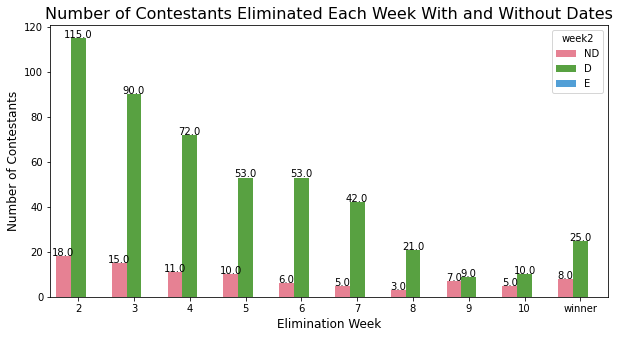

In [29]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot('elim_week', data=bdf_small, hue='week2', 
                      palette='husl', 
                      order=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'winner'])
#graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.xlabel('Elimination Week', fontsize=12)
plt.ylabel('Number of Contestants', fontsize=12)
plt.title('Number of Contestants Eliminated Each Week With and Without Dates', fontsize=16)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#bdf_small

In [31]:
week2_elimd=len(bdf_small[(bdf_small['week2']=='D')  &(bdf_small['elim_week']=='2')])

In [32]:
bdf_small.groupby('week2')['elim_week'].value_counts()

week2  elim_week
D      2            115
       3             90
       4             72
       5             53
       6             53
       7             42
       winner        25
       8             21
       10            10
       9              9
       1              2
E      1            306
ND     2             18
       3             15
       4             11
       5             10
       winner         8
       9              7
       6              6
       10             5
       7              5
       8              3
Name: elim_week, dtype: int64

In [33]:
num_dates_week2=bdf_small['week2'].value_counts()[0]

In [34]:
week_list=['week2', 'week3', 'week4']
#make sure to create the empty list outside of the for loop
date_nums=[]
#col can be any name and refers to the items in week_list
for col in week_list:
    #print out the week to tell you where you are
    print(col)
    #create a value and store it in datenum
    datenum=bdf_small[col].value_counts(sort=False)[1]
    #append the value onto the list and save it
    date_nums.append(datenum)
    print(datenum)

week2
306
week3
441
week4
546


In [35]:
date_nums

[306, 441, 546]

##### How Many one-on-one dates did winners go on?

In [36]:
#create new Df with the contestants who make it to week 10
winners=bachelor_df[(bachelor_df['elim_week']=='winner')]
winners.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,ELIMINATION-8,ELIMINATION-9,ELIMINATION-10,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,NaN,NaN,W,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8
34,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,NaN,NaN,W,NaN,D6,D12,D11,D1,D5,D1,D1,D1,D1,,winner,D,D,D,D,D,D,D,D,D,9
61,Bachelorette,11,11_SHAWN_B,R1,NaN,R,NaN,R,NaN,NaN,NaN,W,NaN,NaN,NaN,D6,D8,D1,NaN,D3,D1,D1,NaN,,winner,ND,D,D,D,ND,D,D,D,W,6
88,Bachelorette,10,10_JOSH_M,NaN,NaN,R,NaN,R,NaN,NaN,NaN,NaN,W,NaN,D14,D12,NaN,D1,D6,D1,D1,D1,D1,,winner,D,D,ND,D,D,D,D,D,D,8
114,Bachelorette,9,09_CHRIS_S,NaN,NaN,R,NaN,R,NaN,NaN,NaN,NaN,W,NaN,NaN,D10,D10,D1,D6,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8


In [37]:
#add column to df that shows how many one-one dates the winners went on 
date={'D1'}
winners['one_on_one']=winners.isin(date).sum(1)
winners.head(5)

<ipython-input-37-09ac578671a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners['one_on_one']=winners.isin(date).sum(1)


,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,ELIMINATION-8,ELIMINATION-9,ELIMINATION-10,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates,one_on_one
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,NaN,NaN,W,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8,5
34,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,NaN,NaN,W,NaN,D6,D12,D11,D1,D5,D1,D1,D1,D1,,winner,D,D,D,D,D,D,D,D,D,9,5
61,Bachelorette,11,11_SHAWN_B,R1,NaN,R,NaN,R,NaN,NaN,NaN,W,NaN,NaN,NaN,D6,D8,D1,NaN,D3,D1,D1,NaN,,winner,ND,D,D,D,ND,D,D,D,W,6,3
88,Bachelorette,10,10_JOSH_M,NaN,NaN,R,NaN,R,NaN,NaN,NaN,NaN,W,NaN,D14,D12,NaN,D1,D6,D1,D1,D1,D1,,winner,D,D,ND,D,D,D,D,D,D,8,5
114,Bachelorette,9,09_CHRIS_S,NaN,NaN,R,NaN,R,NaN,NaN,NaN,NaN,W,NaN,NaN,D10,D10,D1,D6,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8,5


In [38]:
#add column to df that shows how many group dates winners went on
group_date={'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9','D10', 'D11', 'D12', 'D13', 'D14', 'D15'}
winners['group_dates']=winners.isin(group_date).sum(1)
winners.head(10)

<ipython-input-38-5e6829dc1f90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners['group_dates']=winners.isin(group_date).sum(1)


,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,ELIMINATION-8,ELIMINATION-9,ELIMINATION-10,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates,one_on_one,group_dates
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,NaN,NaN,W,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8,5,3
34,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,NaN,NaN,W,NaN,D6,D12,D11,D1,D5,D1,D1,D1,D1,,winner,D,D,D,D,D,D,D,D,D,9,5,4
61,Bachelorette,11,11_SHAWN_B,R1,NaN,R,NaN,R,NaN,NaN,NaN,W,NaN,NaN,NaN,D6,D8,D1,NaN,D3,D1,D1,NaN,,winner,ND,D,D,D,ND,D,D,D,W,6,3,3
88,Bachelorette,10,10_JOSH_M,NaN,NaN,R,NaN,R,NaN,NaN,NaN,NaN,W,NaN,D14,D12,NaN,D1,D6,D1,D1,D1,D1,,winner,D,D,ND,D,D,D,D,D,D,8,5,3
114,Bachelorette,9,09_CHRIS_S,NaN,NaN,R,NaN,R,NaN,NaN,NaN,NaN,W,NaN,NaN,D10,D10,D1,D6,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8,5,3
140,Bachelorette,8,08_JEF_H,NaN,R,NaN,R,R,NaN,NaN,NaN,NaN,W,NaN,D13,D12,D8,D1,D6,D1,D1,D1,D1,,winner,D,D,D,D,D,D,D,D,D,9,5,4
166,Bachelorette,7,07_JP_R,NaN,NaN,R,NaN,NaN,R,R,NaN,NaN,W,NaN,NaN,D1,D10,D8,D1,D3,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8,5,3
192,Bachelorette,6,06_ROBERT_M,R1,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,W,NaN,NaN,D1,D7,D6,D4,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8,5,3
218,Bachelorette,5,05_ED_S,NaN,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,W,NaN,D8,D1,D10,D8,NaN,D1,D1,D1,D1,,winner,D,D,D,D,ND,D,D,D,D,8,5,3
249,Bachelorette,4,04_JESSE_C,R1,NaN,NaN,R,NaN,NaN,NaN,W,NaN,NaN,NaN,D7,D10,D1,D4,D1,D1,D1,NaN,NaN,,winner,D,D,D,D,D,D,D,W,W,7,4,3


In [39]:
winners=winners[['SHOW', 'SEASON','CONTESTANT','week2','week3','week4','week5','week6',
                       'week7','week8','week9','week10', 'total_dates','elim_week', 'one_on_one', 'group_dates']]

In [40]:
winners.head(5)

,SHOW,SEASON,CONTESTANT,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates,elim_week,one_on_one,group_dates
2,Bachelorette,13,13_BRYAN_A,ND,D,D,D,D,D,D,D,D,8,winner,5,3
34,Bachelorette,12,12_JORDAN_R,D,D,D,D,D,D,D,D,D,9,winner,5,4
61,Bachelorette,11,11_SHAWN_B,ND,D,D,D,ND,D,D,D,W,6,winner,3,3
88,Bachelorette,10,10_JOSH_M,D,D,ND,D,D,D,D,D,D,8,winner,5,3
114,Bachelorette,9,09_CHRIS_S,ND,D,D,D,D,D,D,D,D,8,winner,5,3


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of One-On-One Dates the Winners Went On')

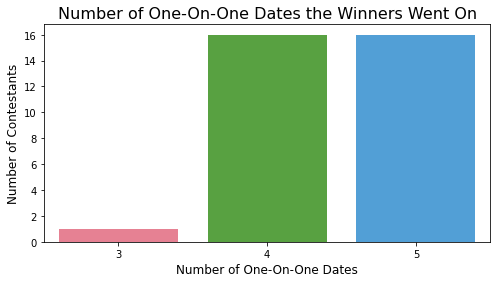

In [61]:
plt.figure(figsize=(8, 4))
sns.countplot('one_on_one', data=winners, palette='husl')
plt.xlabel('Number of One-On-One Dates', fontsize=12)
plt.ylabel('Number of Contestants', fontsize=12)
plt.title('Number of One-On-One Dates the Winners Went On', fontsize=16)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Group Dates Winners Went On')

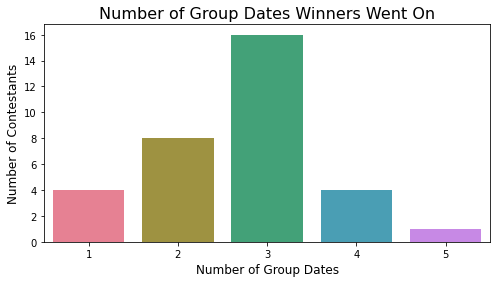

In [60]:
plt.figure(figsize=(8, 4))
sns.countplot('group_dates', data=winners, palette='husl')
plt.xlabel('Number of Group Dates', fontsize=12)
plt.ylabel('Number of Contestants', fontsize=12)
plt.title('Number of Group Dates Winners Went On', fontsize=16)

##### Analysis of first one-on-one

In [43]:
#df of contestants who had the first 1-1 date
first_date=bachelor_df[(bachelor_df['DATES-2']== 'D1')]
first_date.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,ELIMINATION-8,ELIMINATION-9,ELIMINATION-10,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
3,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,NaN,NaN,E,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1,ELIMINATION-10,10,D,D,D,D,D,D,D,D,D,9
40,Bachelorette,12,12_DEREK_P,NaN,R,NaN,NaN,R,ED,NaN,NaN,NaN,NaN,NaN,D1,NaN,D11,D1,D2,NaN,NaN,NaN,NaN,ELIMINATION-6,6,D,ND,D,D,D,E,E,E,E,4
76,Bachelorette,11,11_CLINT_A,NaN,R,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D1,D6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-3,3,D,D,E,E,E,E,E,E,E,2
90,Bachelorette,10,10_CHRIS_S,NaN,R,NaN,NaN,NaN,R,NaN,NaN,ED,NaN,NaN,D1,NaN,NaN,D9,D6,D4,D1,D1,NaN,ELIMINATION-9,9,D,ND,ND,D,D,D,D,D,E,6
100,Bachelorette,10,10_ERIC_H,NaN,R,NaN,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D1,D12,D6,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-4,4,D,D,D,E,E,E,E,E,E,3


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Contestants')

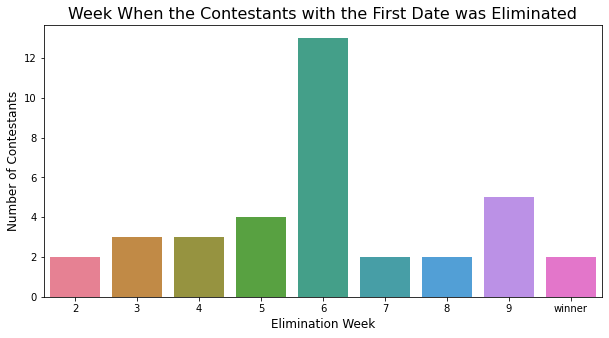

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot('elim_week', data=first_date, order=['2','3','4','5','6','7','8','9','winner'], palette='husl')
plt.title("Week When the Contestants with the First Date was Eliminated", fontsize=16)
plt.xlabel('Elimination Week', fontsize=12 )
plt.ylabel('Number of Contestants', fontsize=12)

##### Analysis of first impression rose

In [45]:
#df of contestants with first impression rose
first_rose= bachelor_df[(bachelor_df['ELIMINATION-1']== 'R1')]
first_rose.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,ELIMINATION-8,ELIMINATION-9,ELIMINATION-10,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,NaN,NaN,W,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8
34,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,NaN,NaN,W,NaN,D6,D12,D11,D1,D5,D1,D1,D1,D1,,winner,D,D,D,D,D,D,D,D,D,9
61,Bachelorette,11,11_SHAWN_B,R1,NaN,R,NaN,R,NaN,NaN,NaN,W,NaN,NaN,NaN,D6,D8,D1,NaN,D3,D1,D1,NaN,,winner,ND,D,D,D,ND,D,D,D,W,6
89,Bachelorette,10,10_NICK_V,R1,NaN,R,NaN,NaN,R,R,NaN,NaN,EU,NaN,NaN,D1,D6,D9,D1,D4,D1,D1,D1,ELIMINATION-10,10,ND,D,D,D,D,D,D,D,D,8
115,Bachelorette,9,09_DREW_K,R1,NaN,NaN,NaN,NaN,R,R,NaN,NaN,ED,NaN,D14,D10,D10,D7,D1,D2,D1,D1,D1,ELIMINATION-10,10,D,D,D,D,D,D,D,D,D,9


In [46]:
#how many winners had first rose?

first_roseW= bachelor_df[(bachelor_df['week10']== 'D') & (bachelor_df['ELIMINATION-1']=='R1') ]
first_roseW

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,ELIMINATION-8,ELIMINATION-9,ELIMINATION-10,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
2,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,NaN,NaN,W,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8
34,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,NaN,NaN,W,NaN,D6,D12,D11,D1,D5,D1,D1,D1,D1,,winner,D,D,D,D,D,D,D,D,D,9
89,Bachelorette,10,10_NICK_V,R1,NaN,R,NaN,NaN,R,R,NaN,NaN,EU,NaN,NaN,D1,D6,D9,D1,D4,D1,D1,D1,ELIMINATION-10,10,ND,D,D,D,D,D,D,D,D,8
115,Bachelorette,9,09_DREW_K,R1,NaN,NaN,NaN,NaN,R,R,NaN,NaN,ED,NaN,D14,D10,D10,D7,D1,D2,D1,D1,D1,ELIMINATION-10,10,D,D,D,D,D,D,D,D,D,9
192,Bachelorette,6,06_ROBERT_M,R1,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,W,NaN,NaN,D1,D7,D6,D4,D1,D1,D1,D1,,winner,ND,D,D,D,D,D,D,D,D,8
353,Bachelor,21,21_VANESSA_G,R1,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,W,NaN,D12,D1,D13,D10,D6,D1,D1,D1,D1,,winner,D,D,D,D,D,D,D,D,D,9
500,Bachelor,16,16_LINDZI_C,R1,NaN,R,NaN,NaN,R,NaN,NaN,NaN,E,NaN,NaN,D1,D8,D9,D6,D1,D1,D1,D1,ELIMINATION-10,10,ND,D,D,D,D,D,D,D,D,8


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Contestants')

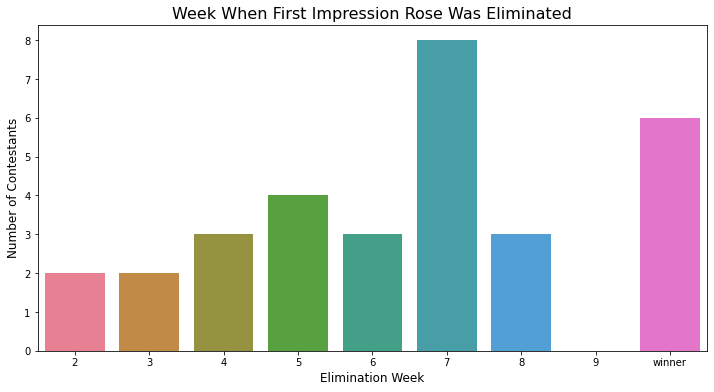

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot('elim_week', data=first_rose, order=['2','3','4','5','6','7','8','9','winner'], palette='husl' )
plt.title('Week When First Impression Rose Was Eliminated', fontsize=16)
plt.xlabel('Elimination Week', fontsize=12)
plt.ylabel('Number of Contestants', fontsize=12)

##### How many contestants who got the first impression rose also went on the first date?

In [48]:
#number of contestants who went on the first date who also got first impression rose
first_date_R1=first_date[(first_date['ELIMINATION-1']=='R1')]
first_date_R1

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,ELIMINATION-8,ELIMINATION-9,ELIMINATION-10,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
124,Bachelorette,9,09_BRYDEN_V,R1,R,NaN,NaN,EQ,NaN,NaN,NaN,NaN,NaN,NaN,D1,D5,D10,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-5,5,D,D,D,ND,E,E,E,E,E,3
282,Bachelorette,3,03_KEITH,R1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D1,D6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-3,3,D,D,E,E,E,E,E,E,E,2
668,Bachelor,10,10_STEPHANIE_T,R1,R,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D1,D5,D4,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-4,4,D,D,D,E,E,E,E,E,E,3
688,Bachelor,9,09_LISA_B,R1,R,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,D1,D6,D4,D1,D1,NaN,NaN,NaN,NaN,ELIMINATION-6,6,D,D,D,D,D,E,E,E,E,5
742,Bachelor,7,07_Sarah W.,R1,R,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,D9,D1,D6,D5,D1,D1,NaN,NaN,NaN,NaN,ELIMINATION-6,6,D,D,D,D,D,E,E,E,E,5
797,Bachelor,5,05_TRISH_S,R1,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,D1,D2,D3,D1,NaN,NaN,NaN,NaN,NaN,ELIMINATION-5,5,D,D,D,D,E,E,E,E,E,4


##### Bachelorette Visualization

In [49]:
bachelorette_df=bachelor_df[['SHOW','SEASON', 'CONTESTANT', 'ELIMINATION-1', 
                             'DATES-2', 'elim_week', 'total_dates' ]]
bachelorette_df=bachelorette_df[bachelorette_df.SHOW!='Bachelor']


In [50]:
bachelorette_df=bachelorette_df[bachelorette_df['total_dates']>0]

In [51]:
#bachelorette first impression rose
bachelorette_r1=bachelorette_df[bachelorette_df['ELIMINATION-1']=='R1']
bachelorette_r1.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
2,Bachelorette,13,13_BRYAN_A,R1,NaN,winner,8
34,Bachelorette,12,12_JORDAN_R,R1,D6,winner,9
61,Bachelorette,11,11_SHAWN_B,R1,NaN,winner,6
89,Bachelorette,10,10_NICK_V,R1,NaN,10,8
115,Bachelorette,9,09_DREW_K,R1,D14,10,9


In [52]:
#bachelorette first date
bachelorette_d1=bachelorette_df[bachelorette_df['DATES-2']=='D1']
bachelorette_d1.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
3,Bachelorette,13,13_PETER_K,NaN,D1,10,9
40,Bachelorette,12,12_DEREK_P,NaN,D1,6,4
76,Bachelorette,11,11_CLINT_A,NaN,D1,3,2
90,Bachelorette,10,10_CHRIS_S,NaN,D1,9,6
100,Bachelorette,10,10_ERIC_H,NaN,D1,4,3


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Success of Contestants with the First Impression Rose and First Date')

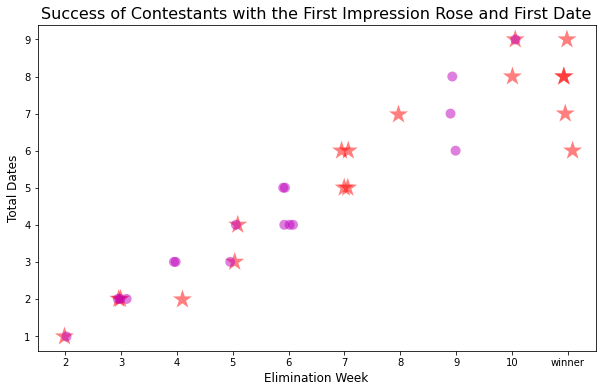

In [53]:
plt.figure(figsize=(10,6))

sns.stripplot(bachelorette_r1.elim_week, bachelorette_r1.total_dates, data=bachelorette_df, 
              marker='*', s=20, color='Red', order=['2', '3', '4', '5', '6', '7', '8', '9','10','winner'], alpha=.5, jitter=True)
sns.stripplot(bachelorette_d1.elim_week, bachelorette_d1.total_dates, data=bachelorette_df, 
               s=10, color='m', order=['2', '3', '4', '5', '6', '7', '8', '9','10','winner'], jitter=True, alpha=.5)
plt.xlabel('Elimination Week', fontsize=12)
plt.ylabel('Total Dates', fontsize=12)
plt.title('Success of Contestants with the First Impression Rose and First Date', fontsize=16)

In [54]:
bachelorette_r1['elim_week'][(bachelorette_r1['elim_week'])=='winner']='11'

<ipython-input-54-18d4d011b8b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bachelorette_r1['elim_week'][(bachelorette_r1['elim_week'])=='winner']='11'
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


##### Bachelor Visualization


In [55]:
guy_lead=bachelor_df[['SHOW','SEASON', 'CONTESTANT', 'ELIMINATION-1', 
                             'DATES-2', 'elim_week', 'total_dates' ]]
guy_lead=guy_lead[guy_lead.SHOW!='Bachelorette']


In [56]:
guy_lead.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
353,Bachelor,21,21_VANESSA_G,R1,D12,winner,9
354,Bachelor,21,21_RAVEN_G,NaN,D12,10,8
355,Bachelor,21,21_RACHEL_L,NaN,NaN,9,7
356,Bachelor,21,21_CORRINE_O,NaN,D12,8,7
357,Bachelor,21,21_KRISTINA_S,NaN,D6,7,6


In [57]:
#bachelor first impression rose
bachelor_r1=guy_lead[guy_lead['ELIMINATION-1']=='R1']
bachelor_r1.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
353,Bachelor,21,21_VANESSA_G,R1,D12,winner,9
391,Bachelor,20,20_OLIVIA_C,R1,D6,6,5
418,Bachelor,19,19_BRITT_N,R1,D11,7,6
449,Bachelor,18,18_SHARLEEN_J,R1,NaN,7,5
477,Bachelor,17,17_TIERRA_L,R1,D13,7,5


In [58]:
#bachelor first date
bachelor_d1=guy_lead[guy_lead['DATES-2']=='D1']
bachelor_d1.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
358,Bachelor,21,21_DANIELLE_M,NaN,D1,7,5
386,Bachelor,20,20_CAILA_Q,NaN,D1,9,7
419,Bachelor,19,19_MEGAN_B,NaN,D1,6,4
445,Bachelor,18,18_CLARE_C,NaN,D1,10,8
450,Bachelor,18,18_KAT_H,NaN,D1,6,4


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Success of Contestants with the First Impression Rose and First Date')

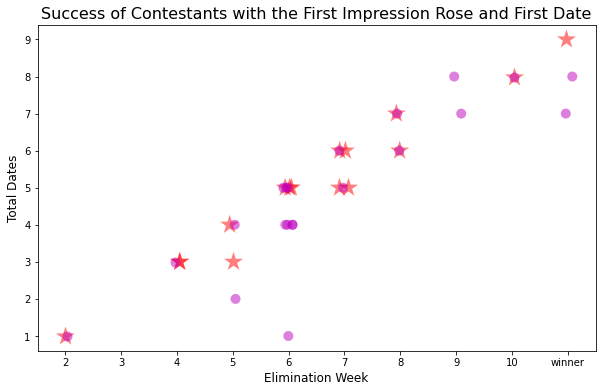

In [59]:
plt.figure(figsize=(10,6))

sns.stripplot(bachelor_r1.elim_week, bachelor_r1.total_dates, data=guy_lead, 
              marker='*', s=20, color='Red', order=['2', '3', '4', '5', '6', '7', '8', '9','10','winner'], alpha=.5, jitter=True)
sns.stripplot(bachelor_d1.elim_week, bachelor_d1.total_dates, data=guy_lead, 
               s=10, color='m', order=['2', '3', '4', '5', '6', '7', '8', '9','10','winner'], jitter=True, alpha=.5)
plt.xlabel('Elimination Week', fontsize=12)
plt.ylabel('Total Dates', fontsize=12)
plt.title('Success of Contestants with the First Impression Rose and First Date', fontsize=16)